# Convolutions, Blurring and Sharpening Images

In this notebook, we're gonna work on:
1. Convolution Operations
2. Blurring 
3. Denoising
4. Sharpening 

In [1]:
# Import dependencies 
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-08-28 19:25:27--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 3.5.246.154
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|3.5.246.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M   127MB/s    in 0.2s    

2022-08-28 19:25:28 (127 MB/s) - ‘images.zip’ saved [29586716/29586716]



## Blurring using Convolutions

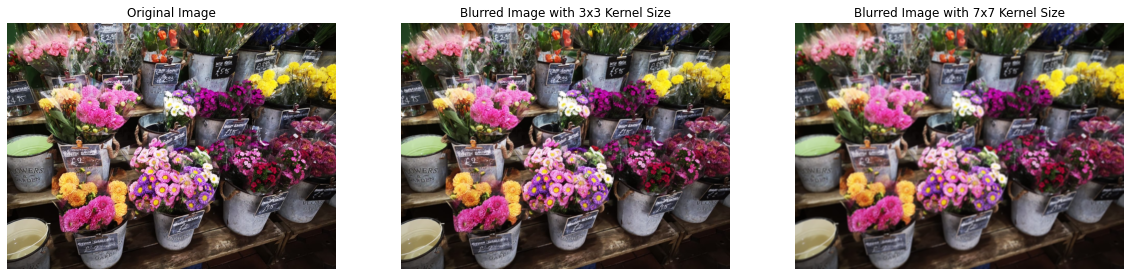

In [3]:
# Load the image
image = cv2.imread('images/flowers.jpeg')

# Creating 3x3 kernel
kernel_size = np.ones((3, 3), np.float32) / 9 

# Use cv2.filter2D to convolve the kernel with an image
blurred_image = cv2.filter2D(image, -1, kernel_size)

# Creating 7x7 kernel
kernel_size2 = np.ones((7, 7), np.float32) / 49

# Make another blurred image
blurred_image2 = cv2.filter2D(image, -1, kernel_size2)

# Plot the images
plt.figure(figsize = (20, 15))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis(False)

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image with 3x3 Kernel Size')
plt.axis(False)

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(blurred_image2, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image with 7x7 Kernel Size')
plt.axis(False);

## Other commonly used Blurring methods in OpenCV

* **Regular Blurring** 
* **Gaussian Blurring**
* **Median Blurring**

Averaging done by convolving the image with a normalized box filter.

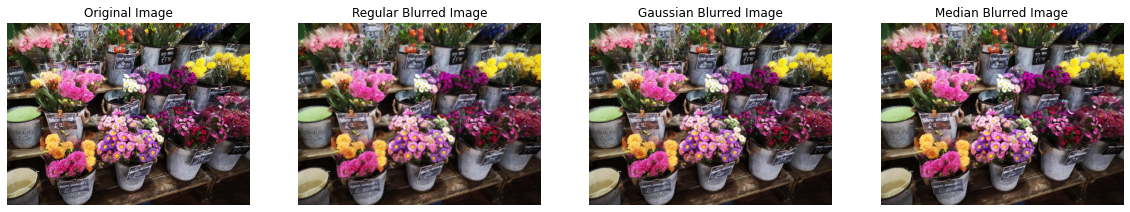

In [4]:
# Load an image
image = cv2.imread('images/flowers.jpeg')

# This takes the pixels under the box and replaces the central element
# Box size needs to odd and positive
regular_blurred_image = cv2.blur(image, (5, 5))

# Instead of box filter, gaussian kernel
gaussian_blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Takes median of all the pixels under kernel area and central
# Element is replaced with this median value
median_blurred_image = cv2.medianBlur(image, 5)

# Plot the images
plt.figure(figsize = (20, 18))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis(False)

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(regular_blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Regular Blurred Image')
plt.axis(False)

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(gaussian_blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Blurred Image')
plt.axis(False)

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(median_blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Median Blurred Image')
plt.axis(False);

## Bilateral Filter

`dst = cv.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])`

Args:
* **src** - Source 8-bit or floating-point, 1-channel or 3-channel image.
* **dst** - Destination image of the same size and type as src.
* **d** - Diameter of each pixel neighborhood that is used during filtering, If it's non-positive then it's computed from sigmaSpace.
* **sigmaColor** - Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.
* **sigmaSpace** - Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor). When d > 0 it's specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.
* **borderType** - Border mode used to extrapolate pixels outside of the image.

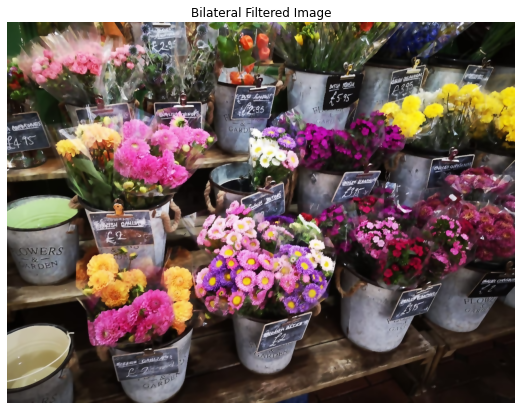

In [5]:
# Bilateral is very effective in noise removal while keeping edges sharp
bilateral_filtered_image = cv2.bilateralFilter(image, 9, 75, 75)

# Plot the image
plt.figure(figsize = (12, 7))
plt.imshow(cv2.cvtColor(bilateral_filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Bilateral Filtered Image')
plt.axis('off')
plt.show()

## Image De-noising - Non-Local Means Denoising

There are 4 variations of Non-Local Means Denoising:
1. `cv2.fastNlMeansDenoising()` - works with a single grayscale images
2. `cv2.fastNlMeansDenoisingColored()` - works with a color image
3. `cv2.fastNlMeansDenoisingMulti()` - works with image sequence captured in short period of time (grayscale images)
4. `cv2.fastNlMeansDenoisingColoredMulti()` - same as above, but for color images.

`fastNlMeansDenoisingColored(InputArray src, OutputArray dst, float, h = 3, float, hColor = 3, int templateWindowSize = 7, int searchWindowSize = 21)`

Parameters for fastNIMeansDenoisingColored:
* **src&** - Input 8-bit 3-channel image.
* **dst** - Output image with the same size and type as src. 
* **templateWindowSize** - Size in pixels of the template patch that is used to performance linearly
* **searchWindowSize** - Greater denoising time. Recommended value 21 pixels.
* **h** - Parameter regulating filter strength for luminance component. Bigger h value perfectly removes noise but also removes image details, smaller h value preserves details but also preserves some noise.
* **hColor** - The same as h but for color components. For most images value equals 10 will be enough to remove colored noise and do not distort colors.

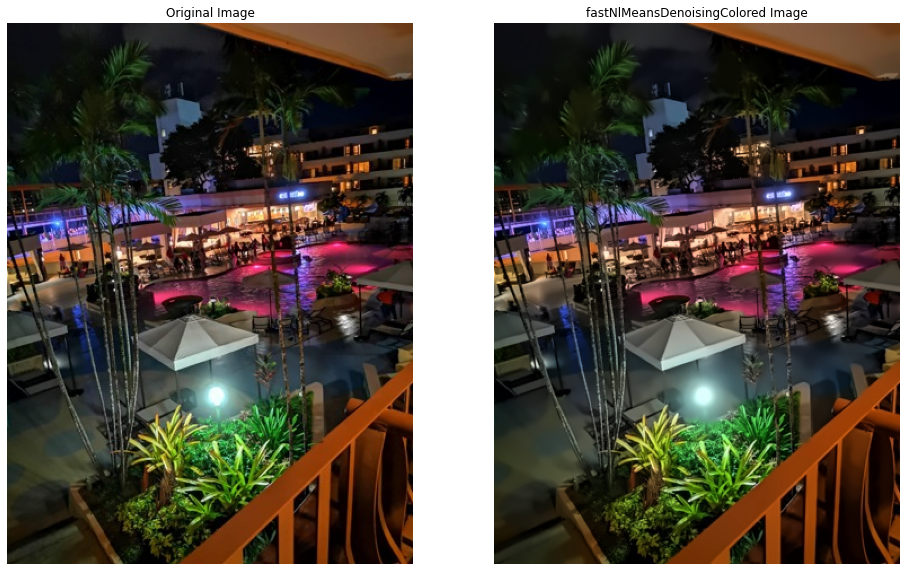

In [6]:
# Load an image
image = cv2.imread('images/hilton.jpeg')

# Let's use fastNlMeansDenoisingColored
dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)

# Show the images
plt.figure(figsize = (16, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('fastNlMeansDenoisingColored Image')
plt.axis('off');

## Sharpening Images

Sharpening Images basically means enhancing the edges of the images a bit more. 

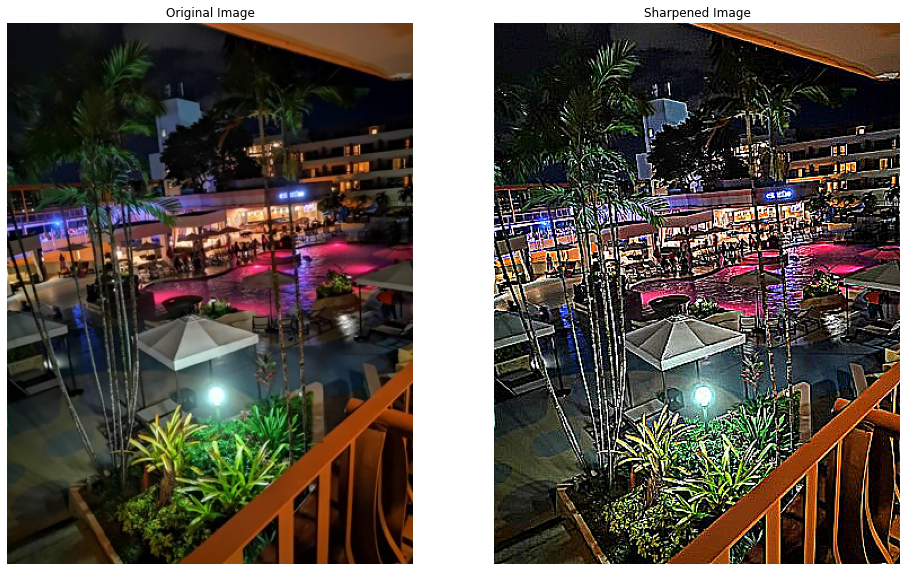

In [7]:
# Load our image
image = cv2.imread('images/hilton.jpeg')

# Create our sharpening kernel, remember it must sum to one
kernel_sharpening = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])

# Applying the sharpening kernel to our image
sharpened_image = cv2.filter2D(image, -1, kernel_sharpening)

# Show our images to see the differences
plt.figure(figsize = (16, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis(False)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')
plt.axis(False);